In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train= pd.read_excel('Data_train.xlsx')
                       
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [3]:
df_train.shape

(6019, 13)

In [4]:
df_train.drop(['New_Price'],axis=1,inplace=True)


In [ ]:
#df_train['New_Price']=df_train['New_Price'].interpolate(method='linear', axis=0).ffill().bfill()

In [ ]:
# df_train['New_Price']=df_train['New_Price'].str.replace('[^0-9]','')
# df_train['New_Price']=df_train['New_Price'].astype('float64')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
df_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
df_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
#df_train.groupby('Location')

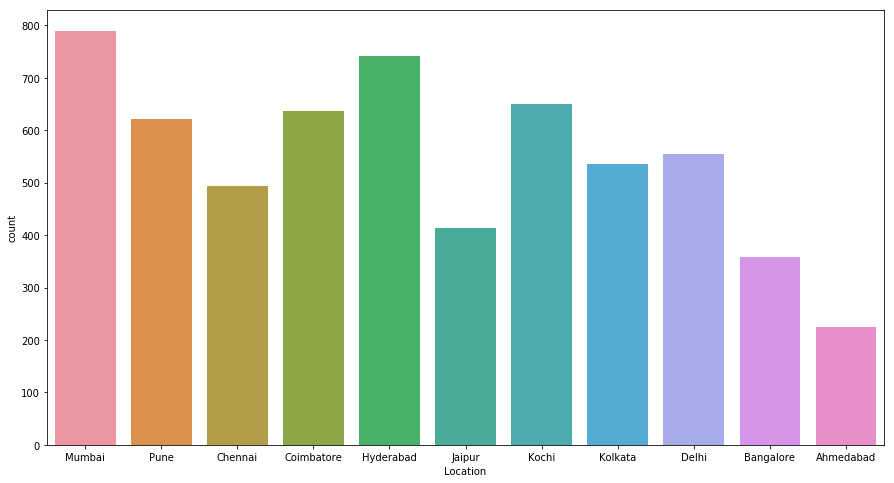

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(df_train['Location'])
plt.show()

[Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Pune'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Coimbatore'),
 Text(0, 0, 'Hyderabad'),
 Text(0, 0, 'Jaipur'),
 Text(0, 0, 'Kochi'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Bangalore'),
 Text(0, 0, 'Ahmedabad')]

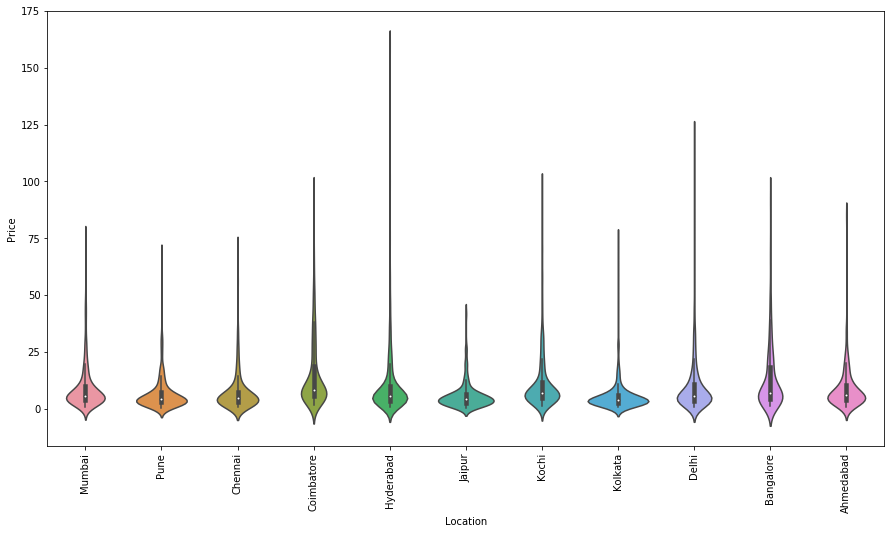

In [10]:
plt.figure(figsize=(15,8))
loc=sns.violinplot(x='Location',y='Price',data=df_train)
loc.set_xticklabels(loc.get_xticklabels(),rotation=90)


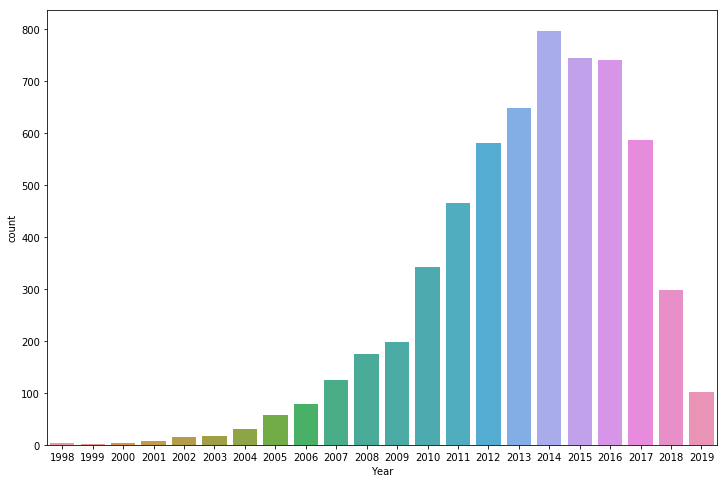

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(df_train['Year'])

[Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

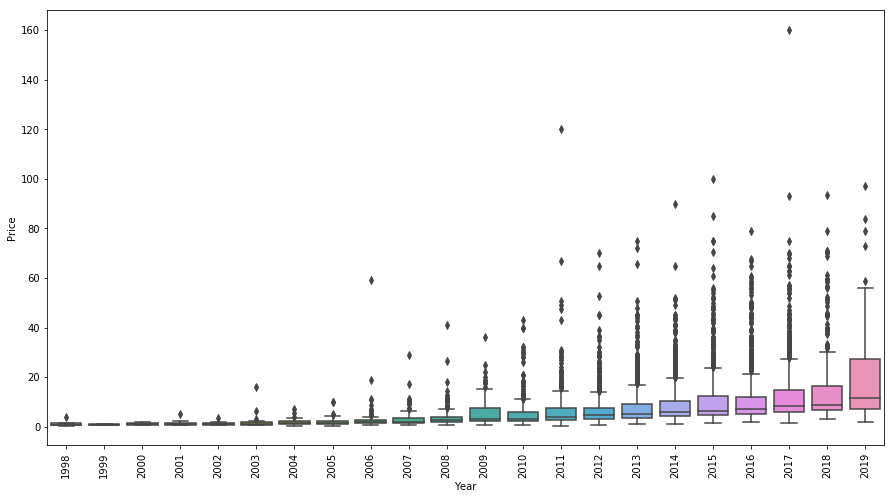

In [12]:
plt.figure(figsize=(15,8))
loc=sns.boxplot(x='Year',y='Price',data=df_train)
loc.set_xticklabels(loc.get_xticklabels(),rotation=90)

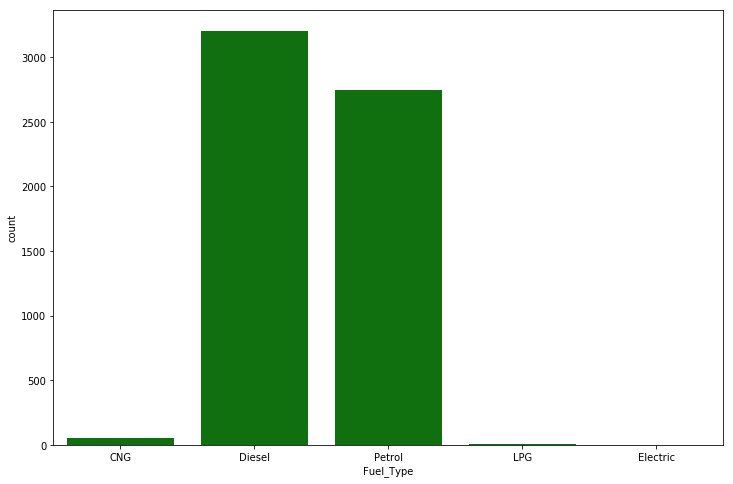

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(df_train['Fuel_Type'],color='Green')

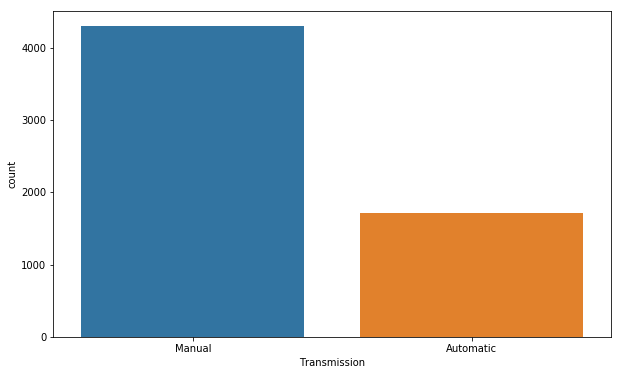

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(df_train['Transmission'])

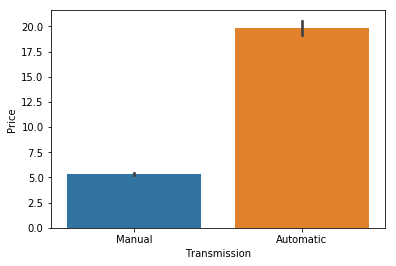

In [15]:
sns.barplot(x=df_train.Transmission,y=df_train.Price)

In [16]:
df_train['Engine']=df_train['Engine'].str.replace('[^0-9]','')
df_train['Engine']=df_train['Engine'].astype('float64')

In [17]:
df_train['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
5        814.0
6       1461.0
7       2755.0
8       1598.0
9       1248.0
10      1462.0
11      1497.0
12      1248.0
13      2179.0
14      2179.0
15      2477.0
16      1498.0
17      1248.0
18      1461.0
19      2143.0
20      1995.0
21      1248.0
22      1984.0
23      1197.0
24      1598.0
25      1497.0
26      1461.0
27       998.0
28      1199.0
29      2494.0
         ...  
5989    1968.0
5990    2179.0
5991    1248.0
5992    1798.0
5993    1797.0
5994    1497.0
5995    1461.0
5996    2179.0
5997     998.0
5998    1198.0
5999    1193.0
6000    1197.0
6001    1968.0
6002    1598.0
6003     998.0
6004    1341.0
6005    1248.0
6006    2987.0
6007    1248.0
6008    2967.0
6009    2494.0
6010    1198.0
6011    3597.0
6012    2494.0
6013    1498.0
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6019, dtype: float64

In [18]:
df_train['Engine'].median()

1493.0

In [19]:
df_train['Engine']=df_train['Engine'].fillna(df_train['Engine'].median())


In [20]:
df_train['Engine'].isnull().sum()


0

In [21]:
df_train['Power']=df_train['Power'].str.replace('[^0-9]','')
df_train['Power']=pd.to_numeric(df_train['Power'],errors='coerce')

In [22]:
df_train['Power']=df_train['Power'].fillna(df_train['Power'].median())

In [23]:
df_train['Mileage'].fillna(method='ffill',inplace=True)

In [24]:
df_train['Mileage']=df_train['Mileage'].str.replace('[^0-9]','')
df_train['Mileage']=df_train['Mileage'].astype('float64')

In [25]:
df_train['Seats'].fillna(method='ffill',inplace=True)

In [26]:
df_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [27]:
df_train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               430
Engine                146
Power                 370
Seats                   9
Price                1373
dtype: int64

In [28]:
df_train['Transmission'],Transmission=pd.factorize(df_train['Transmission'])
df_train['Fuel_Type'],Fuel_Type=pd.factorize(df_train['Fuel_Type'])
df_train['Owner_Type'],Oqner_Type=pd.factorize(df_train['Owner_Type'])
df_train['Location'],Location=pd.factorize(df_train['Location'])
df_train['Name'],Name=pd.factorize(df_train['Name'])



In [29]:

df_train['Year']=df_train['Year'].apply(lambda x: 2019-x)


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null int64
Location             6019 non-null int64
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null int64
Transmission         6019 non-null int64
Owner_Type           6019 non-null int64
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
Price                6019 non-null float64
dtypes: float64(5), int64(7)
memory usage: 564.4 KB


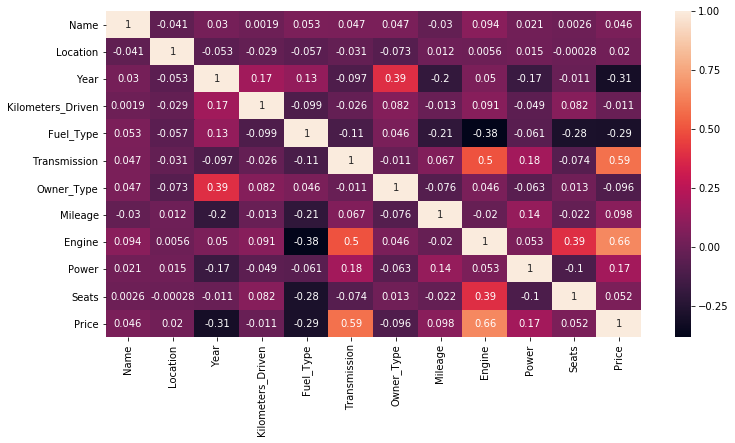

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [32]:
df_train.corr()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Name,1.000000,-0.041137,0.029709,0.001946,0.052996,0.047086,0.047386,-0.030250,0.093890,0.020524,0.002603,0.046118
Location,-0.041137,1.000000,-0.053099,-0.029288,-0.057276,-0.031249,-0.072897,0.011607,0.005574,0.015048,-0.000284,0.020010
Year,0.029709,-0.053099,1.000000,0.173048,0.130269,-0.097059,0.391026,-0.197929,0.050086,-0.171425,-0.010983,-0.305327
Kilometers_Driven,0.001946,-0.029288,0.173048,1.000000,-0.098833,-0.025663,0.081791,-0.012757,0.090890,-0.049040,0.082432,-0.011493
Fuel_Type,0.052996,-0.057276,0.130269,-0.098833,1.000000,-0.113006,0.045866,-0.206945,-0.382390,-0.060538,-0.284197,-0.289585
Transmission,0.047086,-0.031249,-0.097059,-0.025663,-0.113006,1.000000,-0.011413,0.067140,0.499194,0.179085,-0.074320,0.586025
Owner_Type,0.047386,-0.072897,0.391026,0.081791,0.045866,-0.011413,1.000000,-0.075551,0.045655,-0.063432,0.013118,-0.095508
Mileage,-0.030250,0.011607,-0.197929,-0.012757,-0.206945,0.067140,-0.075551,1.000000,-0.019728,0.135624,-0.021721,0.097709
Engine,0.093890,0.005574,0.050086,0.090890,-0.382390,0.499194,0.045655,-0.019728,1.000000,0.053411,0.390980,0.657347
Power,0.020524,0.015048,-0.171425,-0.049040,-0.060538,0.179085,-0.063432,0.135624,0.053411,1.000000,-0.102506,0.174763


In [33]:
df_train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               430
Engine                146
Power                 370
Seats                   9
Price                1373
dtype: int64

In [34]:
y=df_train['Price']

In [36]:
x=df_train.drop(['Price','Kilometers_Driven','Owner_Type','Name'],axis=1)
x

,Location,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,0,9,0,0,266.0,998.0,5816.0,5.0
1,1,4,1,0,1967.0,1582.0,1262.0,5.0
2,2,8,2,0,182.0,1199.0,887.0,5.0
3,2,7,1,0,2077.0,1248.0,8876.0,7.0
4,3,6,1,1,152.0,1968.0,1408.0,5.0
5,4,7,3,0,211.0,814.0,552.0,5.0
6,5,6,1,0,2308.0,1461.0,631.0,5.0
7,0,3,1,1,1136.0,2755.0,1715.0,8.0
8,1,6,1,0,2054.0,1598.0,1036.0,5.0
9,2,7,1,0,223.0,1248.0,74.0,5.0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x.shape

(6019, 8)

In [39]:
x.head()

,Location,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,0,9,0,0,266.0,998.0,5816.0,5.0
1,1,4,1,0,1967.0,1582.0,1262.0,5.0
2,2,8,2,0,182.0,1199.0,887.0,5.0
3,2,7,1,0,2077.0,1248.0,8876.0,7.0
4,3,6,1,1,152.0,1968.0,1408.0,5.0


In [40]:
y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

In [ ]:
import statsmodels.api as sm


# x = sm.add_constant(x) # Add an intercept to our model

# model         = sm.OLS(y, x).fit() ## OLS(output, input)
# predictions   = model.predict(x)

# ## Print the statistics
# model.summary()

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [42]:
xtrain.head()

,Location,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
2293,3,6,2,0,260.0,624.0,35.0,4.0
4252,3,4,2,0,211.0,814.0,552.0,5.0
3756,5,10,2,0,161.0,796.0,37.0,4.0
4273,0,3,2,1,1467.0,1798.0,17746.0,5.0
5750,0,3,1,0,2045.0,1461.0,838.0,5.0


In [ ]:
ytrain.shape

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)

In [50]:
xtest=sc.fit_transform(xtest)

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [52]:
ypred

array([10.44727582,  0.66804217,  6.09272817, ...,  9.29554767,
       29.19846786,  6.22853731])

In [53]:
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
ytest

5150     7.25
2164     4.25
1136     3.90
5641     8.41
1515    13.48
1675     4.25
2268     5.35
143      1.67
4646     3.75
5008     3.25
4113     6.75
4092     3.00
2611     3.52
2301     5.21
5473     1.40
4194     6.99
2359     4.50
5864     8.25
4218     3.50
2769     1.75
3251     6.50
1014     2.25
2102     2.20
3202     4.30
3449     4.65
4431     3.84
5009    68.00
572      8.31
2793    11.88
2840     6.15
        ...  
4888     5.25
4962     5.25
4101    57.00
3780     4.00
4389    21.99
3926     5.91
3365     6.20
3067     5.85
5770     9.45
3411     3.11
1505    97.07
5355     3.80
4649     8.90
811      5.50
2154     5.49
2124     7.74
5035     2.75
3981     8.80
1284     1.99
162      6.20
4130    12.49
5048     1.65
5971     3.50
985      2.10
1069     3.85
1786    12.75
1755    40.00
3552     5.95
3079    29.80
2979     5.70
Name: Price, Length: 1806, dtype: float64

In [55]:
mse=mean_squared_error(ytest,ypred)
mse

45.77319892115838

In [56]:
rmse=np.sqrt(mse)
rmse

6.765589325488089

In [57]:
rsquare=r2_score(ytest,ypred)
rsquare

0.6355520919705824

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
gb= GradientBoostingRegressor(learning_rate=0.2, n_estimators=400, random_state=100)
gb_model=gb.fit(xtrain,ytrain)
gbpred=gb_model.predict(xtest)
mse=mean_squared_error(ytest,gbpred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,gbpred)

In [72]:
r2

0.23887126508490353

In [62]:
rmse

9.777255416097523

In [64]:
from sklearn.ensemble import AdaBoostRegressor
ab= AdaBoostRegressor(lr,n_estimators=400,learning_rate=0.2,random_state=100)
ab_model=ab.fit(xtrain,ytrain)
abpred=ab_model.predict(xtest)
mse=mean_squared_error(ytest,abpred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,abpred)

In [65]:
r2

0.38227772374319624

In [66]:
rmse

8.808146575798766

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


In [73]:
model1 = LinearRegression()

model2 = RandomForestRegressor(n_estimators=60,criterion='mse',random_state=0)

model3 = Ridge(alpha=0.037, normalize=True)

model4 = Lasso(alpha=.2,normalize=True)
model5= GradientBoostingRegressor(learning_rate=0.2,n_estimators=600,random_state=100)

rock = []

model_names = []

kf=KFold(n_splits=10,shuffle=True,random_state=0)

for model,name in zip([model1,model2,model3,model4,model5],['LinR','RanF','Ridge','Lasso','Gradient boosting']):

    all_rmse =[]

    for train,test in kf.split(x,y):

        x_train,x_test=x.iloc[train,:],x.iloc[test,:]

        y_train,y_test=y.iloc[train],y.iloc[test]

        model.fit(x_train,y_train)

        y_pred=model.predict(x_test)

        rmse = np.sqrt(mean_squared_error(y_test,y_pred))

        all_rmse.append(rmse)

        rock.append(rmse)

    model_names.append(name)

    print('RMSE scores : %.06f (+/- %.06f) [%s]'% (np.mean(all_rmse),np.var(all_rmse,ddof=1),name))

RMSE scores : 6.728666 (+/- 0.417616) [LinR]
RMSE scores : 3.894200 (+/- 0.698630) [RanF]
RMSE scores : 6.737297 (+/- 0.420104) [Ridge]
RMSE scores : 11.177827 (+/- 0.254325) [Lasso]
RMSE scores : 3.748708 (+/- 1.037228) [Gradient boosting]
